In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [ ]:
img = cv2.imread(r'Cancerous103.jpg')

In [ ]:
 b,g,r = cv2.split(img)

In [18]:
rgb_img = cv2.merge([r,g,b])

In [ ]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [ ]:
kernel = np.ones((2,2),np.uint8)
#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)

In [ ]:
sure_bg = cv2.dilate(closing,kernel,iterations=3)

In [ ]:
dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,3)

In [ ]:
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)

In [ ]:
sure_fg = np.uint8(sure_fg)

In [ ]:
unknown = cv2.subtract(sure_bg,sure_fg)

In [ ]:
ret, markers = cv2.connectedComponents(sure_fg)

In [ ]:
markers = markers+1

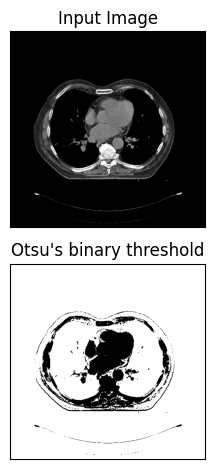

In [ ]:
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.subplot(211),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(thresh, 'gray')
plt.imsave(r'thresh.png',thresh)
plt.title("Otsu's binary threshold"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

In [ ]:
import math
n=int(input("Enter the number of points = "))
l1=[]
l2=[]
for i in range (1,n+1):
    l1.append(int(input("Enter the x-co-ordinate of %d point = "%(i))))
    l2.append(int(input("Enter the y-co-ordinate of %d point = "%(i))))
l=zip(l1,l2)                            #combines the 2lists to create a list of tuples #((1,1),(2,1))
p=list(l)                               #converts l to list           [(1,1),(2,1)]
print("The points are = ",p)
a=int(input("Enter the number of clusters = "))
k=[]
b=[]
for i in range (0,a):                   #a -> no. of clusters
    m=list(p[i])                        #converts each tuple(consisting of co-ordinates) to list [[1,1],[2,1]]
    k.append(m)                         #list carrying the centroids
    b.append(m)                         #copy of centroids used later to chk if the repeat
print("The centroids are = ",k)
print()
y=[]                                    #distance matrix
while True:
    for j in range (0,a):
        x=[]                            #sublist in y considering dist of each pt from each cluster
        for i in range (0,n):
            q=math.pow(p[i][0]-k[j][0],2)
            w=math.pow(p[i][1]-k[j][1],2)
            t=math.sqrt(q+w)
            x.append(t)
            h=list(x)
        y.append(h)
    print("The distance of all points from centroid is : ")
    print()
    for i in range (0,a):
        for j in range (0,n):
            v=y[i][j]
            print("{:.2f}".format(v))      # a=13.946 print("{0:.2f}".format(a)) #13.95
        print()
    print()
    g=[]                                #new cluster
    for i in range (0,a):
      g.append([])                    #creating sublists in g which is equal to no. of clusters
    for i in range (0,n):
        min1=y[0][i]                    #dist of pt from 1st cluster
        for j in range (1,a):
            if(min1>y[j][i]):
                g[j].append(i)
            else:
                g[0].append(i)
    print("New clusters are :",g)
    print()
    k.clear()                           #cal new centroids
    for i in range(0,a):
        j=0
        s1=0.0
        s2=0.0
        while(j<len(g[i])):
            e=g[i][j]
            s1=s1+l1[e]
            s2=s2+l2[e]
            j=j+1
        c1=s1/len(g[i])
        c2=s2/len(g[i])
        k.append([c1,c2])
        print("The new centroids are = ",k)
    print()
    x.clear()
    y.clear()
    g.clear()
    if(b==k):
        break
    else:
        b.clear()
        b=k
print()
print("Final centroids are = ",k)

Enter the number of points = 3
Enter the x-co-ordinate of 1 point = 8
Enter the y-co-ordinate of 1 point = 4
Enter the x-co-ordinate of 2 point = 7
Enter the y-co-ordinate of 2 point = 9
Enter the x-co-ordinate of 3 point = 10
Enter the y-co-ordinate of 3 point = 4
The points are =  [(8, 4), (7, 9), (10, 4)]
Enter the number of clusters = 3
The centroids are =  [[8, 4], [7, 9], [10, 4]]

The distance of all points from centroid is : 

0.00
5.10
2.00

5.10
0.00
5.83

2.00
5.83
0.00


New clusters are : [[0, 0, 1, 2], [1], [2]]

The new centroids are =  [[8.25, 5.25]]
The new centroids are =  [[8.25, 5.25], [7.0, 9.0]]
The new centroids are =  [[8.25, 5.25], [7.0, 9.0], [10.0, 4.0]]

The distance of all points from centroid is : 

1.27
3.95
2.15

5.10
0.00
5.83

2.00
5.83
0.00


New clusters are : [[0, 0, 1, 2], [1], [2]]

The new centroids are =  [[8.25, 5.25]]
The new centroids are =  [[8.25, 5.25], [7.0, 9.0]]
The new centroids are =  [[8.25, 5.25], [7.0, 9.0], [10.0, 4.0]]


Final ce

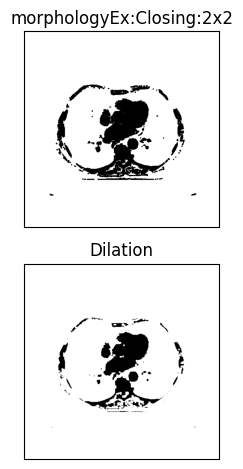

In [ ]:
# SEGMENTATION
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread(r'Cancerous103.jpg')
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.subplot(211),plt.imshow(closing, 'gray')
plt.title("morphologyEx:Closing:2x2"), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(sure_bg, 'gray')
plt.imsave(r'dilation.png',sure_bg)
plt.title("Dilation"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

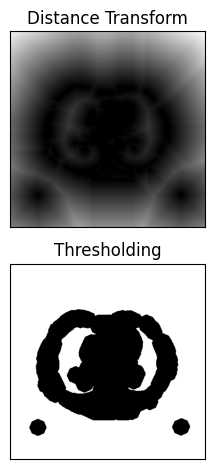

In [ ]:
plt.subplot(211),plt.imshow(dist_transform, 'gray')
plt.title("Distance Transform"), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(sure_fg, 'gray')
plt.title("Thresholding"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

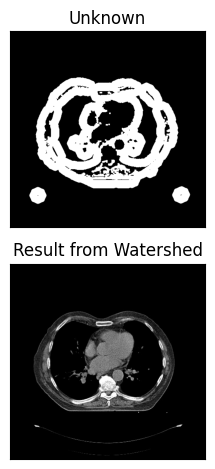

In [ ]:
plt.subplot(211),plt.imshow(unknown, 'gray')
plt.title("Unknown"), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(img, 'gray')
plt.title("Result from Watershed"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()


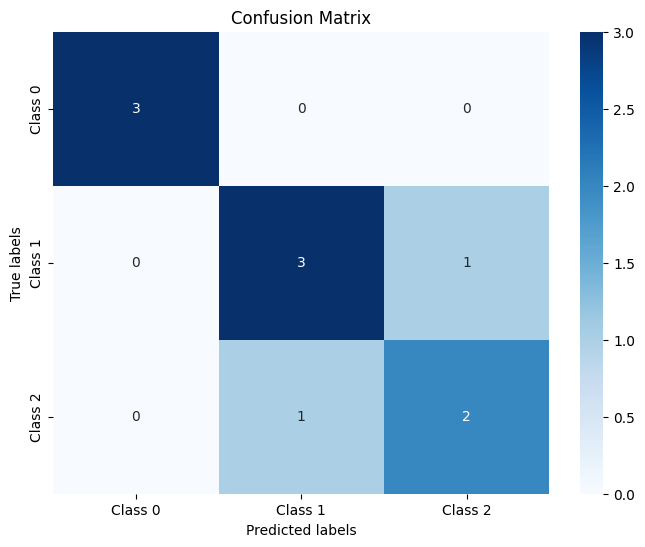

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Example data
actual_labels = [1, 0, 1, 2, 1, 0, 1, 2, 2, 0]
predicted_labels = [1, 0, 1, 2, 2, 0, 1, 2, 1, 0]

# Create confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()